In [ ]:
Pure Arbitrage (Pure Arb) -> Cross Exchange Arbitrage

Contingent on Speed & spotting inefficiencies within the market
Simultaneously buys and sells a security in different markets to take advatanges of price differences
HUGE market! ONLY if you have the fastest algorithm for execution and implementation; this helps the markets to be more efficient

In [1]:
import pandas as pd
import numpy as np

In [3]:
gemini = pd.read_excel('BTCPrices.xlsx',sheet_name = 'Gemini', na_values=None) # You would replace these datasets with 
# live streamed data.
reuters = pd.read_excel('BTCPrices.xlsx', sheet_name = 'Reuters') # Note that you can't actually trade Crypto on Eikon Reuters.
# This is just pricing history data. (and an example.)

In [ ]:
List of alternative exchanges with API to find arbitrage opportunities

Binance API
Bittrex API
Poloniex API
Coinbase API
Kraken API
BitFinex API
Bitstamp API
Hitbtc API
Gemini API
Kucoin API

In [7]:
gemini = gemini.set_index("Date (EST)")
gemini

,Unix Timestamp,Date (UTC),Date (EST Value),Time,Symbol,Open,High,Low,Close,Volume
Date (EST),,,,,,,,,,
2021-11-20 19:04:00,1637453040000,2021-11-21 00:04:00,2021-11-20 19:04:00,19:04:00,BTCUSD,59710.00,59750.12,59701.05,59736.69,4.922584
2021-11-20 19:03:00,1637452980000,2021-11-21 00:03:00,2021-11-20 19:03:00,19:03:00,BTCUSD,59693.05,59717.75,59668.88,59710.00,0.798032
2021-11-20 19:02:00,1637452920000,2021-11-21 00:02:00,2021-11-20 19:02:00,19:02:00,BTCUSD,59721.66,59721.66,59672.27,59693.05,1.134838
2021-11-20 19:01:00,1637452860000,2021-11-21 00:01:00,2021-11-20 19:01:00,19:01:00,BTCUSD,59779.96,59779.96,59692.75,59721.66,0.511603
2021-11-20 19:00:00,1637452800000,2021-11-21 00:00:00,2021-11-20 19:00:00,19:00:00,BTCUSD,59770.47,59795.45,59766.62,59779.96,0.144430
...,...,...,...,...,...,...,...,...,...,...
2021-11-19 21:00:00,1637373600000,2021-11-20 02:00:00,2021-11-19 21:00:00,21:00:00,BTCUSD,58883.87,58883.87,58856.82,58880.40,1.878430
2021-11-19 20:59:00,1637373540000,2021-11-20 01:59:00,2021-11-19 20:59:00,20:59:00,BTCUSD,58924.65,58924.65,58883.87,58883.87,0.938543
2021-11-19 20:58:00,1637373480000,2021-11-20 01:58:00,2021-11-19 20:58:00,20:58:00,BTCUSD,58916.85,58924.65,58902.91,58924.65,0.265009


In [9]:
reuters = reuters.set_index("Time")
reuters

,Local Date,Bid,Ask,High,Low,Open,Refresh Rate,BidNet
Time,,,,,,,,
2021-11-20 19:04:00,2021-11-20 19:04:00,59700.04,59722.97,59709.00,59643.90,59692.80,117,36.54
2021-11-20 19:03:00,2021-11-20 19:03:00,59663.50,59708.14,59711.00,59646.17,59711.00,136,-21.90
2021-11-20 19:02:00,2021-11-20 19:02:00,59685.40,59705.80,59756.30,59655.07,59751.04,102,-77.01
2021-11-20 19:01:00,2021-11-20 19:01:00,59762.41,59780.21,59794.27,59727.89,59748.71,93,13.70
2021-11-20 19:00:00,2021-11-20 19:00:00,59748.71,59768.54,59748.71,59672.10,59731.89,64,36.54
...,...,...,...,...,...,...,...,...
2021-11-19 21:00:00,2021-11-19 21:00:00,58848.21,58855.76,58912.75,58832.37,58893.40,76,-27.49
2021-11-19 20:59:00,2021-11-19 20:59:00,58875.70,58914.47,58915.85,58867.34,58905.70,84,-19.40
2021-11-19 20:58:00,2021-11-19 20:58:00,58895.10,58935.90,58906.49,58867.50,58867.50,86,21.60


In [ ]:
# In this case, I am just focusing on the Opening value of BTC for my Arbitrage example.
# Reuters (which is traded on the NASDAQ) at 19:04:00 opened at 59,692.80 and Gemini opened at 59,710.00
# |59,692.80 - 59,710.00| = 17.2
# 17.2 / ~ 60,000 is approximately .000286 or .0286%.
# Now, in a perfect world, this is GREAT! However, there are fees that are associated with trading crypto currencies. SO, 
# this spread is not worth it at all! (Example Coinbase charges 2%, which is $1200. -- cheaper if you go coinbase Pro)
# BUT, it seems that Robinhood doesn't charge trading fees?
# Bittrex charges 0.2% on trading 

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

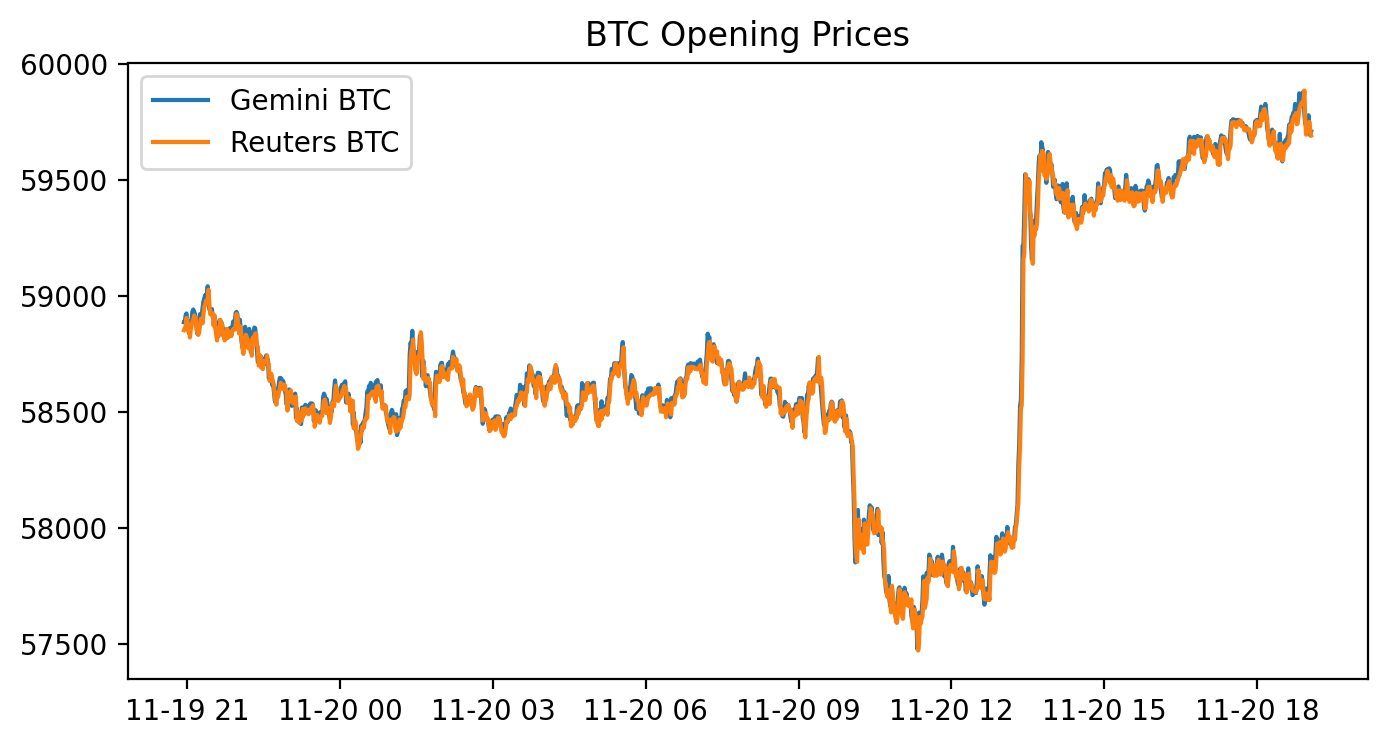

In [13]:
figure(figsize=(8, 4), dpi=200)
gem_BTC = gemini['Open']
reu_BTC = reuters['Open']
plt.plot(gem_BTC, label = "Gemini BTC")
plt.plot(reu_BTC, label = "Reuters BTC")
plt.title('BTC Opening Prices')
plt.legend()

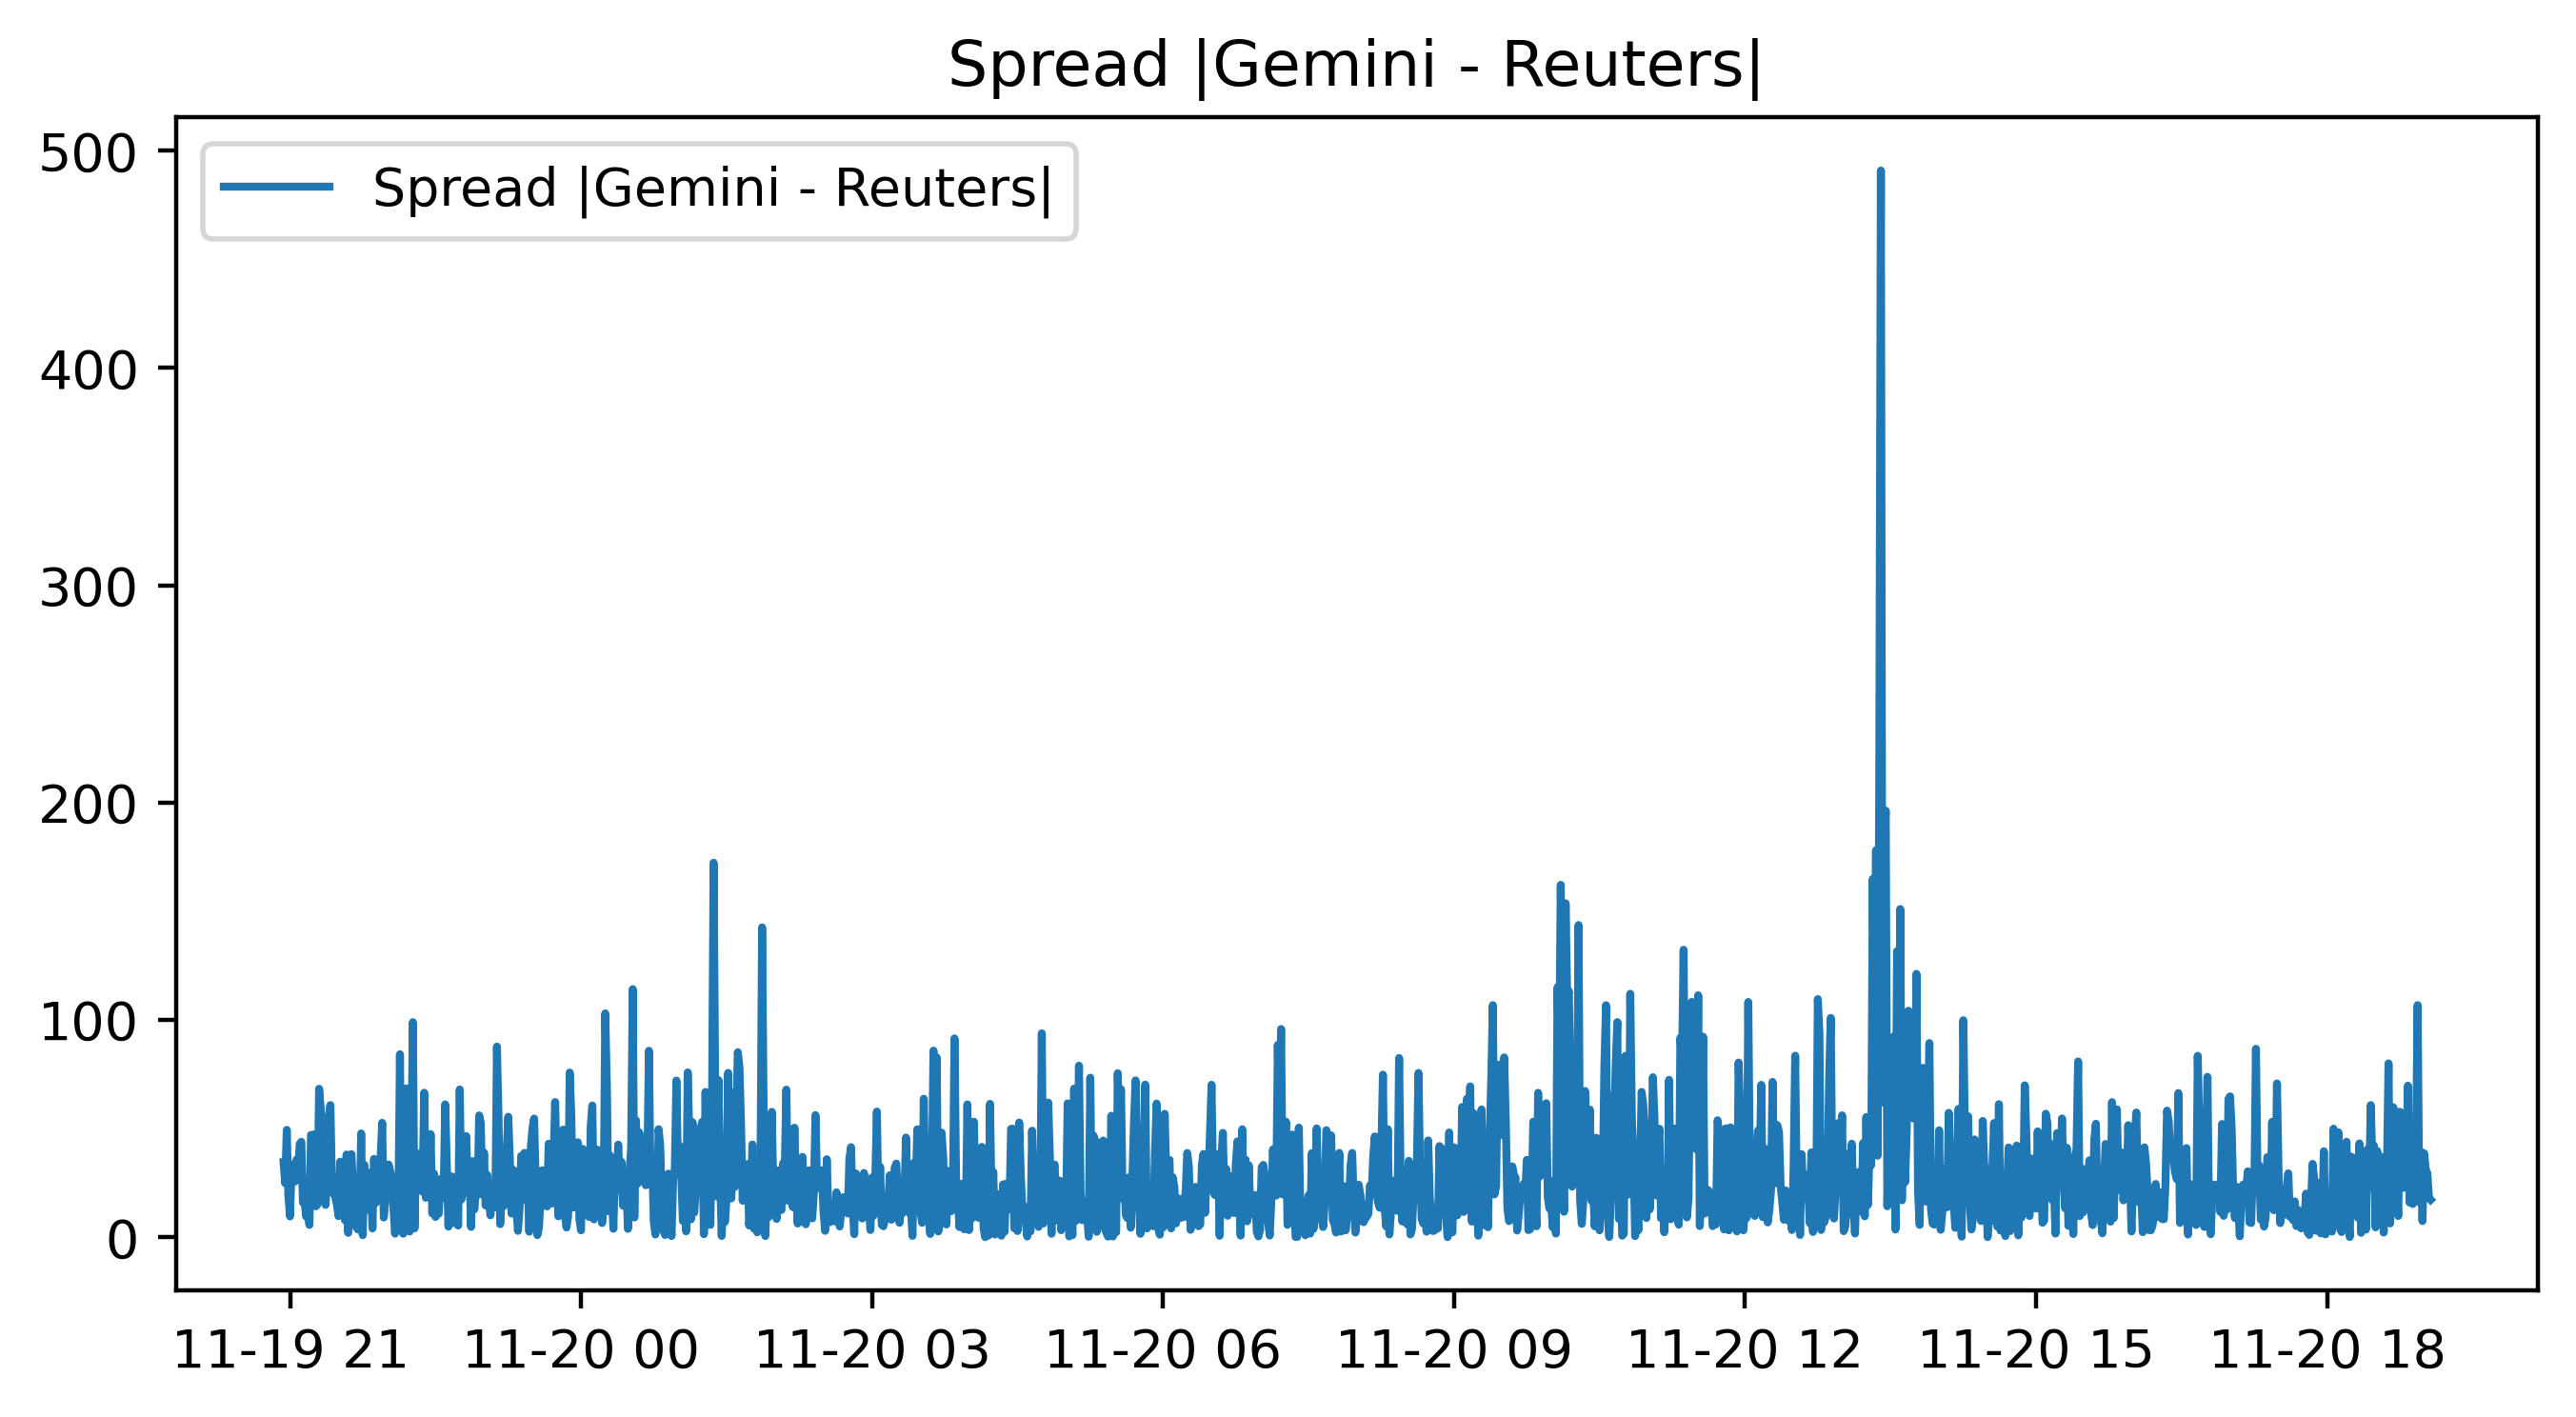

In [15]:
figure(figsize=(8, 4), dpi=400)
plt.plot(abs(gem_BTC - reu_BTC), label = "Spread |Gemini - Reuters|")
plt.title('Spread |Gemini - Reuters|')
plt.legend()

In [17]:
# Sum of the entire spread?
sum(abs(gem_BTC - reu_BTC))# In a PERFECT environment. This does not include fees. If via BTC,

38496.399999999936

In [19]:
# Buy Low in one exchange and sell high in the other exchange.
# Let's combine the necessary columns together.
# 0.2% average between maker and taker.
comb_df = pd.concat([gem_BTC,
                     reu_BTC,
                     abs(gem_BTC - reu_BTC),
                     0.002 * (gem_BTC + reu_BTC)], axis = 1) 
comb_df.columns = ["Gemini_Open", "Reuters_Open", "Absolute_Difference", "Total_Tax"]
comb_df

,Gemini_Open,Reuters_Open,Absolute_Difference,Total_Tax
2021-11-20 19:04:00,59710.00,59692.80,17.20,238.80560
2021-11-20 19:03:00,59693.05,59711.00,17.95,238.80810
2021-11-20 19:02:00,59721.66,59751.04,29.38,238.94540
2021-11-20 19:01:00,59779.96,59748.71,31.25,239.05734
2021-11-20 19:00:00,59770.47,59731.89,38.58,239.00472
...,...,...,...,...
2021-11-19 21:00:00,58883.87,58893.40,9.53,235.55454
2021-11-19 20:59:00,58924.65,58905.70,18.95,235.66070
2021-11-19 20:58:00,58916.85,58867.50,49.35,235.56870
2021-11-19 20:57:00,58885.86,58861.00,24.86,235.49372


In [21]:
# Check out which accounts in the corresponding exchanges need to be bought or sold.
v = pd.DataFrame(np.where(comb_df["Gemini_Open"] > comb_df["Reuters_Open"], 0,1))
v.index = comb_df.index
v.columns = ["BuyGemSellReuOrder"]
comb_df = pd.concat([comb_df, v], axis= 1)
comb_df # Exchange Signal = 0, Sell Gemini; Buy Reuters

,Gemini_Open,Reuters_Open,Absolute_Difference,Total_Tax,BuyGemSellReuOrder
2021-11-20 19:04:00,59710.00,59692.80,17.20,238.80560,0
2021-11-20 19:03:00,59693.05,59711.00,17.95,238.80810,1
2021-11-20 19:02:00,59721.66,59751.04,29.38,238.94540,1
2021-11-20 19:01:00,59779.96,59748.71,31.25,239.05734,0
2021-11-20 19:00:00,59770.47,59731.89,38.58,239.00472,0
...,...,...,...,...,...
2021-11-19 21:00:00,58883.87,58893.40,9.53,235.55454,1
2021-11-19 20:59:00,58924.65,58905.70,18.95,235.66070,0
2021-11-19 20:58:00,58916.85,58867.50,49.35,235.56870,0
2021-11-19 20:57:00,58885.86,58861.00,24.86,235.49372,0


In [23]:
# Execute Trade for profit?
# Check out which accounts in the corresponding exchanges need to be bought or sold.
order66 = pd.DataFrame(np.where(comb_df["Absolute_Difference"] > comb_df["Total_Tax"], 0,1))
order66.index = comb_df.index
order66.columns = ["Execute"]
comb_df = pd.concat([comb_df, order66], axis= 1)
comb_df # Exchange Signal = 0, Sell Gemini; Buy Reuters

,Gemini_Open,Reuters_Open,Absolute_Difference,Total_Tax,BuyGemSellReuOrder,Execute
2021-11-20 19:04:00,59710.00,59692.80,17.20,238.80560,0,1
2021-11-20 19:03:00,59693.05,59711.00,17.95,238.80810,1,1
2021-11-20 19:02:00,59721.66,59751.04,29.38,238.94540,1,1
2021-11-20 19:01:00,59779.96,59748.71,31.25,239.05734,0,1
2021-11-20 19:00:00,59770.47,59731.89,38.58,239.00472,0,1
...,...,...,...,...,...,...
2021-11-19 21:00:00,58883.87,58893.40,9.53,235.55454,1,1
2021-11-19 20:59:00,58924.65,58905.70,18.95,235.66070,0,1
2021-11-19 20:58:00,58916.85,58867.50,49.35,235.56870,0,1
2021-11-19 20:57:00,58885.86,58861.00,24.86,235.49372,0,1


In [25]:
np.unique(comb_df["Execute"], return_counts = True) #LOL!

(array([0, 1]), array([   1, 1328]))

In [27]:
# Let's get a tally on all the orders that would've been executed.
orders_fulfilled = comb_df.loc[comb_df["Execute"] == 0]
orders_fulfilled

,Gemini_Open,Reuters_Open,Absolute_Difference,Total_Tax,BuyGemSellReuOrder,Execute
2021-11-20 13:24:00,59216.09,58725.23,490.86,235.88264,0,0


In [29]:
total_profits = sum(orders_fulfilled["Absolute_Difference"] - orders_fulfilled["Total_Tax"])
total_profits # would've made aroun $255 in one day for only ONE coin on 2 exchanges (Remember that Reuters doesn't trade crypto)

254.9773599999933

In [31]:
# Notice that I am not even including the volume. (Hence everything will be a multiple)
# Retrieving that specific row:
gemini[comb_df["Gemini_Open"] == 59216.09] # 27.31 BTC!!! Probably explains that huge discrpency amongst the "exchanges".

,Unix Timestamp,Date (UTC),Date (EST Value),Time,Symbol,Open,High,Low,Close,Volume
Date (EST),,,,,,,,,,
2021-11-20 13:24:00,1637432640000,2021-11-20 18:24:00,2021-11-20 13:24:00,13:24:00,BTCUSD,59216.09,59347.67,59029.89,59218.88,27.313468


In [33]:
# So, in a perfect world, if there were 27.31 bitcoins on the "Reuters" exchange and I had the capital to pull that arbitrage
# I would walk away with:
(27.313468/2) * total_profits

3482.1579815421487

In [ ]:
# pretty neat!
# You would need to figure out if you are going to sell at market or at limit.
# If the brokerages require a transaction fee (which will eat away at your spread)
# Latency periods
# How much capital you will be trading.
# Probability that the price will "move" away from market price.
# Price convergence (Higher buys and lower sells due to the competitive nature of arbitrage)
# How long to hold bought positions? (Not even talking about options)
# And that is method is not just related to crypto. This can be applied to ANY tradebale security. As long as the asset
# is the "same" in any considered market.